In [1]:
import pandas as pd
import numpy as np
import re

#The following describes each column of the data as can be  found in the heart-disease.names file
columns = {
    "id": "patient identification number",
    "ccf" : "social security number",
    "age" : "age in years",
    "sex" : "1 = male; 0 = female",
    "painloc" : "chest pain location (1 = substernal; 0 = otherwise)",
    "painexer" : "1 = provoked by exertion; 0 = otherwise",
    "relrest" : "1 = relieved after rest; 0 = otherwise",
    "pncaden" : "sum of painloc, painexer, relrest",
    "cp" : "chest pain type;  1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
    "trestbps" : "resting blood pressure (in mm Hg on admission to the hospital)",
    "htn" : "hypertension",
    "chol" : "serum cholestoral in mg/dl",
    "smoke" : "1 = yes; 0 = no (is or is not a smoker)",
    "cigs" :  "cigarettes per day",
    "years" : "number of years as a smoker",
    "fbs" : "fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)",
    "dm" : "1 = history of diabetes; 0 = no such history",
    "famhist" : "family history of coronary artery disease (1 = yes; 0 = no)",
    "restecg" : """resting electrocardiographic results; 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria """,
    "ekgmo" : "month of exercise ECG reading",
    "ekgday" : "day of exercise ECG reading",
    "ekgyr" : "year of exercise ECG reading",
    "dig" : "digitalis used during exercise ECG: 1 = yes; 0 = no",
    "prop" : "Beta blocker used during exercise ECG: 1 = yes; 0 = no",
    "nitr" : "nitrates used during exercise ECG: 1 = yes; 0 = no",
    "pro" : "calcium channel blocker used during exercise ECG: 1 = yes; 0 = no",
    "diuretic" : "diuretic used used during exercise ECG: 1 = yes; 0 = no",
    "proto" : """exercise protocol:
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton 
          7 = bike 150 kpa min/min 
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer""",
    "thaldur" : "duration of exercise test in minutes",
    "thaltime" : "time when ST measure depression was noted",
    "met" : "mets achieved, ratio of working metabolic rate relative to your resting metabolic rate",
    "thalach" : "maximum heart rate achieved",
    "thalrest" : "resting heart rate",
    "tpeakbps" : "peak exercise blood pressure (first of 2 parts)",
    "tpeakbpd" : "peak exercise blood pressure (second of 2 parts)",
    "dummy" : "na",
    "trestbpd" : "resting blood pressure",
    "exang" : "exercise induced angina (1 = yes; 0 = no)",
    "xhypo" : "(1 = yes; 0 = no)",
    "oldpeak" : "ST depression induced by exercise relative to rest",
    "slope" : """the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping""",
    "rldv5" : "height at rest",
    "rldv5e" : "height at peak exercise",
    "ca" : "number of major vessels (0-3) colored by flourosopy",
    "restckm" : "irrelevant",
    "exerckm" : "irrelevant",
    "restef" : "rest raidonuclid (sp?) ejection fraction",
    "restwm" : """rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)""",
    "exeref" : "exercise radinalid (sp?) ejection fraction",
    "exerwm" : "exercise wall (sp?) motion", 
    "thal" : "3 = normal; 6 = fixed defect; 7 = reversable defect",
    "thalsev" : "not used",
    "thalpul" : "not used",
    "earlobe" : "not used",
    "cmo" : "month of cardiac cath (sp?)  (perhaps 'call')",
    "cday" : "day of cardiac cath (sp?)",
    "cyr" : "year of cardiac cath (sp?)",
    "num" : """diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: following 10 attributes)""",
    "lmt" : "left main truck",
    "ladprox" : "left anterior descending (proximal)",
    "laddist" : "left anterior descending (distal)",
    "diag" : "diagonal branches",
    "cxmain" : "circumflex",
    "ramus" : "Ramus intermedius",
    "om1" : "first obtuse marginal branch",
    "om2" : "second obtuse marginal branch",
    "rcaprox" : "proximal right coronary artery",
    "rcadist" : "distal right coronary artery",
    "lvx1" : "not used",
    "lvx2" : "not used",
    "lvx3" : "not used",
    "lvx4" : "not used",
    "lvf" : "not used",
    "cathef" : "not used",
    "junk" : "not used",
    "name" : "last name of patient, not used" 
}

In [2]:
##Code used in various locations, usefule for keeping track of different rows null attributes
def null():
    nulls = df.loc[df[col] == -9]
    nulls = nulls["id"].values
    skip = False
    for i in range(0,len(nulls)):
        for j in range(0,len(nullData)):
            if nullData[j][0] == nulls[i]:
                nullData[j][1].append(col)
                skip = True
                break
        if not skip:
            nullData.append([nulls[i],[col]])
        skip = False
    print(nullData)

In [3]:
#We now assign the columns' names to the data since this was not formatted initially
df = pd.read_csv("hungarian_aligned.txt", sep = " ", header = None)
df.columns = columns.keys()

#The number of attributes in our data
print(len(df.columns))

76


In [4]:
#Initial description of data
print(df.describe())

"""
Key Points:
    - There are some useless attributes either because they entirely consist of -9.0 (the symbol used for NULL) or because the
    data was omitted, eg. social security number (ccf)
    - df.dropna(axis=1, how="all") doesn't work well here since there is a different symbol used to represent NULL, -9.0. 
    We will therefore deal with each column one by one as they come
"""

                id    ccf         age         sex     painloc    painexer  \
count   294.000000  294.0  294.000000  294.000000  294.000000  294.000000   
mean   1195.853741    0.0   47.826531    0.724490    0.921769    0.442177   
std     397.340367    0.0    7.811812    0.447533    0.268993    0.497492   
min    1001.000000    0.0   28.000000    0.000000    0.000000    0.000000   
25%    1080.250000    0.0   42.000000    0.000000    1.000000    0.000000   
50%    1158.500000    0.0   49.000000    1.000000    1.000000    0.000000   
75%    1235.750000    0.0   54.000000    1.000000    1.000000    1.000000   
max    5002.000000    0.0   66.000000    1.000000    1.000000    1.000000   

          relrest  pncaden          cp    trestbps  ...         om2  \
count  294.000000    294.0  294.000000  294.000000  ...  294.000000   
mean     0.520408     -9.0    2.982993  132.102041  ...   -8.812925   
std      0.500435      0.0    0.965117   19.437564  ...    1.424686   
min      0.000000     

'\nKey Points:\n    - There are some useless attributes either because they entirely consist of -9.0 (the symbol used for NULL) or because the\n    data was omitted, eg. social security number (ccf)\n    - df.dropna(axis=1, how="all") doesn\'t work well here since there is a different symbol used to represent NULL, -9.0. \n    We will therefore deal with each column one by one as they come\n'

In [5]:
#Analyse data types of each attribute, here we can see we are working with numeric data
with pd.option_context("display.max_rows", None): 
    print(df.dtypes)

id            int64
ccf           int64
age           int64
sex           int64
painloc       int64
painexer      int64
relrest       int64
pncaden       int64
cp            int64
trestbps      int64
htn           int64
chol          int64
smoke         int64
cigs          int64
years         int64
fbs           int64
dm            int64
famhist       int64
restecg       int64
ekgmo         int64
ekgday        int64
ekgyr         int64
dig           int64
prop          int64
nitr          int64
pro           int64
diuretic      int64
proto         int64
thaldur     float64
thaltime    float64
met         float64
thalach       int64
thalrest      int64
tpeakbps      int64
tpeakbpd      int64
dummy         int64
trestbpd      int64
exang         int64
xhypo         int64
oldpeak     float64
slope         int64
rldv5         int64
rldv5e        int64
ca            int64
restckm       int64
exerckm       int64
restef        int64
restwm        int64
exeref        int64
exerwm        int64


In [6]:
#Analysing column 1: id
col = "id"
print(columns[col]+"\n")
print(df[col])

"""
    - This field only contains unique 4 digit number for each entry in our dataframe, it does not hold any useful information
    that our model can learn from to predict heart disease since heart disease does not depend on this arbitrary id value
    - We will therefore exclude this column
"""
drop = []
drop.append("id")

patient identification number

0      1254
1      1255
2      1256
3      1257
4      1258
       ... 
289    1053
290    1054
291    5001
292    5000
293    5002
Name: id, Length: 294, dtype: int64


In [7]:
#Analysing column 2: ccf
col = "ccf"
print(columns[col]+"\n")
print(df[col].describe())

"""
    - This column contains redundant values of 0 for social security for privacy purposes
    - Our models can't learn from these arbitrary numbers so we will exclude this column too
"""

drop.append("ccf")

social security number

count    294.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: ccf, dtype: float64


In [8]:
#Analysing column 3: age
col = "age"
print(columns[col]+"\n")
print(df[col].describe())

#Check each value is an integer in the appropriate range
for i in range(0,len(df[col])):
    w = str(df[col][i])
    x = re.search("[0-6][0-9]", w)
    if not x:
        print(False)
        break
print(True)

age in years

count    294.000000
mean      47.826531
std        7.811812
min       28.000000
25%       42.000000
50%       49.000000
75%       54.000000
max       66.000000
Name: age, dtype: float64
True


In [9]:
#Analysing column 4: sex
col = "sex"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts())

#213 + 81 = 294 as expected
"""
    - Note that there are a lot more male subjects than female, this may skew our outcome later on
"""

1 = male; 0 = female

count    294.000000
mean       0.724490
std        0.447533
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64 

1    213
0     81
Name: sex, dtype: int64


'\n    - Note that there are a lot more male subjects than female, this may skew our outcome later on\n'

In [10]:
#Analysing column 5: painloc
col = "painloc"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts())

#271 + 23 = 294 as expected
"""
    - Note there are a lot more subjects with substernal pain
"""

chest pain location (1 = substernal; 0 = otherwise)

count    294.000000
mean       0.921769
std        0.268993
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: painloc, dtype: float64 

1    271
0     23
Name: painloc, dtype: int64


'\n    - Note there are a lot more subjects with substernal pain\n'

In [11]:
#Analysing column 6: painexer
col = "painexer"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts())

#164 + 130 = 294 as expected

1 = provoked by exertion; 0 = otherwise

count    294.000000
mean       0.442177
std        0.497492
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: painexer, dtype: float64 

0    164
1    130
Name: painexer, dtype: int64


In [12]:
#Analysing column 7: relrest
col = "relrest"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts())

#153 + 141 = 294 as expected

1 = relieved after rest; 0 = otherwise

count    294.000000
mean       0.520408
std        0.500435
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: relrest, dtype: float64 

1    153
0    141
Name: relrest, dtype: int64


In [13]:
#Analysing column 8: pncaden
col = "pncaden"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts())

"""
    - We can see this column is unused (recall -9.0 = NULL), and it in fact is unlikely to be useful since it is just the 
    sum of the previous features which we have already included
    - We will also drop this column
"""
drop.append("pncaden")

sum of painloc, painexer, relrest

count    294.0
mean      -9.0
std        0.0
min       -9.0
25%       -9.0
50%       -9.0
75%       -9.0
max       -9.0
Name: pncaden, dtype: float64 

-9    294
Name: pncaden, dtype: int64


In [14]:
#Analysing column 9: cp
col = "cp"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts())

#123 + 106 + 54 + 11 = 294 as expected

chest pain type;  1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic

count    294.000000
mean       2.982993
std        0.965117
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: cp, dtype: float64 

4    123
2    106
3     54
1     11
Name: cp, dtype: int64


In [15]:
#Analysing column 10: trestbps
col = "trestbps"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

#Since there are some null values, we are going to keep track of these as they come
nullData = []
null()



resting blood pressure (in mm Hg on admission to the hospital)

count    294.000000
mean     132.102041
std       19.437564
min       -9.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64 

 120    65
 130    54
 140    50
 150    23
 110    21
 160    20
 125     8
 180     6
 100     6
 135     5
 170     5
 145     5
 112     3
 122     2
 118     2
 124     2
 115     2
 132     1
 106     1
 105     1
 98      1
 138     1
 200     1
 92      1
 155     1
 128     1
 113     1
 108     1
 136     1
 190     1
 142     1
-9       1
Name: trestbps, dtype: int64 

[[1053, ['trestbps']]]


In [16]:
#Analysing column 11: htn
col = "htn"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

hypertension

count    294.000000
mean       0.302721
std        0.720395
min       -9.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: htn, dtype: float64 

 0    195
 1     98
-9      1
Name: htn, dtype: int64 

[[1053, ['trestbps']], [1103, ['htn']]]


In [17]:
#Analysing column 12: chol
col = "chol"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

serum cholestoral in mg/dl

count    294.000000
mean     230.520408
std       95.414336
min       -9.000000
25%      198.000000
50%      237.000000
75%      277.000000
max      603.000000
Name: chol, dtype: float64 

-9      23
 275     5
 246     5
 230     5
 211     4
        ..
 156     1
 338     1
 282     1
 259     1
 166     1
Name: chol, Length: 154, dtype: int64 

[[1053, ['trestbps']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], [1051, ['chol']], [1052, ['chol']]]


In [18]:
#Analysing column 13: smoke
col = "smoke"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")


1 = yes; 0 = no (is or is not a smoker)

count    294.000000
mean      -8.625850
std        1.818415
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max        1.000000
Name: smoke, dtype: float64 

-9    282
 0     10
 1      2
Name: smoke, dtype: int64 



In [19]:
#Analysing column 14: cigs
col = "cigs"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

cigarettes per day

count    294.000000
mean      -8.765306
std        4.024162
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max       60.000000
Name: cigs, dtype: float64 

-9     293
 60      1
Name: cigs, dtype: int64 



In [20]:
#Analysing column 15: years
col = "years"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - Since this column is all NULL and there were 282 (out of 294) NULL responses for whether or not subjects smoke, 
    as well as 293 NULL responses for years as a smoker, this data is very underdeveloped and won't help our models learn
    - We have decided to exclude these 3 columns as a result
"""
drop += ["smoke", "cigs", "years"]

number of years as a smoker

count    294.0
mean      -9.0
std        0.0
min       -9.0
25%       -9.0
50%       -9.0
75%       -9.0
max       -9.0
Name: years, dtype: float64 

-9    294
Name: years, dtype: int64 



In [21]:
#Analysing column 16: fbs
col = "fbs"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)

count    294.000000
mean      -0.176871
std        1.499491
min       -9.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64 

 0    266
 1     20
-9      8
Name: fbs, dtype: int64 

[[1053, ['trestbps']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], [1051, ['chol']], [1052, ['chol']], [1282, ['fbs']], [1201, ['fbs']], [1229, ['fbs']], [1062, ['fbs']], [1071, ['fbs']], [1089, ['fbs']], [1109, ['fbs']], [1111, ['fbs']]]


In [22]:
#Analysing column 17: dm
col = "dm"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - There are a lot more (273/294) NULL values in this field and we can't assume values of 0 for NULLs
    - We've decided to exclude this column
    - Note: although we remove it, it could be the case that all of the nulls are meant to mean 0, people didnt bother answering
    question that didnt apply to them
"""
drop.append(col)



1 = history of diabetes; 0 = no such history

count    294.000000
mean      -8.285714
std        2.579785
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max        1.000000
Name: dm, dtype: float64 

-9    273
 1     21
Name: dm, dtype: int64 



In [23]:
#Analysing column 18: famhist
col = "famhist"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    -Again, since this column is mostly NULL, we have decided to exclude it
"""
drop.append(col)

family history of coronary artery disease (1 = yes; 0 = no)

count    294.000000
mean      -8.969388
std        0.524891
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max        0.000000
Name: famhist, dtype: float64 

-9    293
 0      1
Name: famhist, dtype: int64 



In [24]:
#Analysing column 19: restecg
col = "restecg"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

resting electrocardiographic results; 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria 

count    294.000000
mean       0.187075
std        0.707616
min       -9.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: restecg, dtype: float64 

 0    235
 1     52
 2      6
-9      1
Name: restecg, dtype: int64 

[[1053, ['trestbps']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], [1051, ['chol']], [1052, ['chol']], [1282, ['fbs

In [25]:
#Analysing column 20: ekgmo
col = "ekgmo"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - Useless data, wont help models learn
"""
drop.append(col)

month of exercise ECG reading

count    294.000000
mean       6.061224
std        3.203506
min        1.000000
25%        3.000000
50%        5.000000
75%        9.000000
max       12.000000
Name: ekgmo, dtype: float64 

3     48
5     36
4     34
7     29
11    27
6     23
10    19
9     17
2     17
12    15
1     15
8     14
Name: ekgmo, dtype: int64 



In [26]:
#Analysing column 21: ekgday
col = "ekgday"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - Useless data, wont help models learn
"""
drop.append(col)

day of exercise ECG reading

count    294.000000
mean      15.761905
std        8.717667
min        1.000000
25%        9.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: ekgday, dtype: float64 

16    20
2     14
3     13
9     13
30    11
21    11
22    11
12    11
25    11
26    10
7     10
8     10
10    10
24    10
20    10
13    10
28     9
11     9
18     9
29     8
19     8
27     8
15     8
14     8
6      7
1      7
5      7
23     6
17     6
31     5
4      4
Name: ekgday, dtype: int64 



In [27]:
#Analysing column 22: ekgyr
col = "ekgyr"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - Useless data, wont help models learn
"""
drop.append(col)

year of exercise ECG reading

count    294.000000
mean      85.200680
std        1.122467
min       83.000000
25%       84.000000
50%       85.000000
75%       86.000000
max       87.000000
Name: ekgyr, dtype: float64 

86    91
85    84
84    62
87    36
83    21
Name: ekgyr, dtype: int64 



In [28]:
#Analysing column 23: dig
col = "dig"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - Everyone was 0 except 1 value of null, so useless data, we exclude
"""
drop.append(col)

digitalis used during exercise ECG: 1 = yes; 0 = no

count    294.000000
mean      -0.030612
std        0.524891
min       -9.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.000000
Name: dig, dtype: float64 

 0    293
-9      1
Name: dig, dtype: int64 



In [29]:
#Analysing column 24: prop
col = "prop"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

Beta blocker used during exercise ECG: 1 = yes; 0 = no

count    294.000000
mean       0.000000
std        0.783795
min       -9.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: prop, dtype: float64 

 0    274
 1     18
-9      2
Name: prop, dtype: int64 

[[1053, ['trestbps']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], [1051, ['chol']], [1052, ['chol']], [1282, ['fbs']], [1201, ['fbs']], [1229, ['fbs']], [1062, ['fbs']], [1071, ['fbs']], [1089, ['fbs']], [1109, ['fbs']], [1111, ['fbs']], [1001, ['restecg']], [1284, ['prop']], [1294, ['prop']]]


In [30]:
#Analysing column 25: nitr
col = "nitr"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

nitrates used during exercise ECG: 1 = yes; 0 = no

count    294.000000
mean       0.064626
std        0.606484
min       -9.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: nitr, dtype: float64 

 0    265
 1     28
-9      1
Name: nitr, dtype: int64 

[[1053, ['trestbps']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], [1051, ['chol']], [1052, ['chol']], [1282, ['fbs']], [1201, ['fbs']], [1229, ['fbs']], [1062, ['fbs']], [1071, ['fbs']], [1089, ['fbs']], [1109, ['fbs']], [1111, ['fbs']], [1001, ['restecg']], [1284, ['prop']], [1294, ['prop', 'nitr']]]


In [31]:
#Analysing column 26: pro
col = "pro"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

calcium channel blocker used during exercise ECG: 1 = yes; 0 = no

count    294.000000
mean       0.051020
std        0.596448
min       -9.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: pro, dtype: float64 

 0    269
 1     24
-9      1
Name: pro, dtype: int64 

[[1053, ['trestbps']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], [1051, ['chol']], [1052, ['chol']], [1282, ['fbs']], [1201, ['fbs']], [1229, ['fbs']], [1062, ['fbs']], [1071, ['fbs']], [1089, ['fbs']], [1109, ['fbs']], [1111, ['fbs']], [1001, ['restecg']], [1284, ['prop']], [1294, ['prop', 'nitr', 'pro']]]


In [32]:
#Analysing column 27: diuretic
col = "diuretic"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - Plenty of previous drug information, majority dont use this so its essentially useless
"""
drop.append(col)

diuretic used used during exercise ECG: 1 = yes; 0 = no

count    294.000000
mean      -0.020408
std        0.535043
min       -9.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: diuretic, dtype: float64 

 0    290
 1      3
-9      1
Name: diuretic, dtype: int64 



In [33]:
#Analysing column 28: proto
col = "proto"
print(columns[col]+"\n")
#print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - This column is meant to assign caategorical data to each row as described in the instructions; however there are values
    which are not in the legend such as 75, 100, 125, 50 150... in fact the numbers given dont make sense with the instructions
    given, so we have decided to exclude this column
"""
drop.append(col)

exercise protocol:
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton 
          7 = bike 150 kpa min/min 
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer

 75     73
 100    70
 125    52
 50     34
 150    25
 25     16
 175    12
-9       9
 200     2
 130     1
Name: proto, dtype: int64 



In [34]:
#Analysing column 29: thaldur
col = "thaldur"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

duration of exercise test in minutes

count    294.000000
mean      10.493197
std        4.901412
min       -9.000000
25%        7.000000
50%       10.000000
75%       13.000000
max       24.000000
Name: thaldur, dtype: float64 

 10.0    28
 9.0     27
 7.0     24
 11.0    23
 12.0    23
 13.0    23
 8.0     18
 14.0    16
 6.0     15
 18.0    15
 19.0    12
 5.0     10
 4.0      9
 2.0      8
 15.0     8
 3.0      7
 16.0     6
 20.0     6
 17.0     5
-9.0      2
 1.5      2
 6.5      1
 16.5     1
 21.0     1
 7.5      1
 24.0     1
 4.5      1
 1.0      1
Name: thaldur, dtype: int64 

[[1053, ['trestbps']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [104

In [35]:
#Analysing column 30: thaltime
col = "thaltime"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - This column is also mostly NULL so we are going to exclude it
"""
drop.append(col)

time when ST measure depression was noted

count    294.000000
mean      -3.136054
std        8.311051
min       -9.000000
25%       -9.000000
50%       -9.000000
75%        5.000000
max       20.000000
Name: thaltime, dtype: float64 

-9.0     190
 10.0     12
 8.0      11
 4.0       8
 12.0      8
 6.0       8
 3.0       6
 5.5       6
 5.0       4
 2.0       4
 11.0      3
 7.0       3
 1.0       3
 9.0       3
 6.5       3
 7.5       3
 3.5       2
 4.5       2
 13.0      2
 19.0      2
 15.0      2
 14.5      1
 17.5      1
 20.0      1
 0.5       1
 8.5       1
 2.5       1
 1.5       1
 13.5      1
 10.5      1
Name: thaltime, dtype: int64 



In [36]:
#Analysing column 31: met
col = "met"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

mets achieved, ratio of working metabolic rate relative to your resting metabolic rate

count    294.000000
mean       5.600340
std        2.217546
min       -9.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       11.000000
Name: met, dtype: float64 

 5.0     68
 6.0     58
 7.0     56
 4.0     34
 9.0     27
 3.0     23
 2.0     13
 10.0     5
 8.0      3
-9.0      2
 6.3      2
 11.0     1
 7.5      1
 5.4      1
Name: met, dtype: int64 

[[1053, ['trestbps']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], [1051, ['chol']], [1052, ['chol']], [1282, ['fbs']], [1201, ['fbs']], [1229, ['fbs']], [1062, ['fbs']], [1071, [

In [37]:
#Analysing column 32: thalach
col = "thalach"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

maximum heart rate achieved

count    294.00000
mean     138.62585
std       25.08408
min       -9.00000
25%      122.00000
50%      140.00000
75%      155.00000
max      190.00000
Name: thalach, dtype: float64 

 150    29
 140    21
 130    17
 170    14
 160    13
        ..
 114     1
 87      1
 121     1
 153     1
-9       1
Name: thalach, Length: 72, dtype: int64 

[[1053, ['trestbps', 'thalach']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], [1051, ['chol']], [1052, ['chol']], [1282, ['fbs']], [1201, ['fbs']], [1229, ['fbs']], [1062, ['fbs']], [1071, ['fbs']], [1089, ['fbs']], [1109, ['fbs']], [1111, ['fbs']], [1001, ['restecg']], [1

In [38]:
#Analysing column 33: thalrest
col = "thalrest"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

resting heart rate

count    294.000000
mean      80.727891
std       16.373231
min       -9.000000
25%       70.000000
50%       80.000000
75%       92.000000
max      134.000000
Name: thalrest, dtype: float64 

 100    16
 68     15
 98     15
 80     13
 90     13
 72     12
 70     12
 84     12
 74     11
 73     11
 92     11
 78     10
 75     10
 64      8
 76      7
 67      7
 86      7
 82      7
 85      7
 88      6
 58      6
 83      5
 56      5
 54      4
 110     4
 62      4
 65      4
 60      4
 96      4
 105     3
 120     3
 125     3
 95      2
 97      2
 94      2
 93      2
 102     2
 66      2
 77      2
 81      2
 71      2
 57      2
 63      2
 112     1
 124     1
 108     1
 115     1
 134     1
 55      1
 46      1
 61      1
 116     1
 50      1
 79      1
 87      1
-9       1
Name: thalrest, dtype: int64 

[[1053, ['trestbps', 'thalach', 'thalrest']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211

In [39]:
#Analysing column 34: tpeakbps
col = "tpeakbps"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()


peak exercise blood pressure (first of 2 parts)

count    294.000000
mean     180.632653
std       27.876148
min       -9.000000
25%      160.000000
50%      180.000000
75%      200.000000
max      240.000000
Name: tpeakbps, dtype: float64 

 180    43
 170    39
 160    37
 200    33
 190    31
 220    19
 150    15
 230    11
 210    10
 140    10
 130     6
 145     5
 240     5
 176     2
 182     2
 158     2
 174     2
 175     2
 120     2
 196     2
 216     1
 146     1
 165     1
 188     1
 215     1
 172     1
 185     1
 194     1
 135     1
 155     1
 235     1
 228     1
 184     1
 198     1
 192     1
-9       1
Name: tpeakbps, dtype: int64 

[[1053, ['trestbps', 'thalach', 'thalrest', 'tpeakbps']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [116

In [40]:
#Analysing column 35: tpeakbpd
col = "tpeakbpd"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

peak exercise blood pressure (second of 2 parts)

count    294.000000
mean      95.357143
std       13.776309
min       -9.000000
25%       90.000000
50%       95.000000
75%      100.000000
max      134.000000
Name: tpeakbpd, dtype: float64 

 100    67
 90     64
 80     45
 110    28
 95     13
 120    12
 105     9
 115     7
 70      6
 82      5
 98      5
 104     4
 96      3
 85      3
 106     3
 84      3
 92      2
 108     2
 118     2
 130     2
 94      2
 60      1
 116     1
 86      1
 134     1
 74      1
 76      1
-9       1
Name: tpeakbpd, dtype: int64 

[[1053, ['trestbps', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, 

In [41]:
#Analysing column 36: dummy
col = "dummy"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - There is no description about this column available, so we have decided to exclude it
"""
drop.append(col)

na

count    294.000000
mean     132.102041
std       19.437564
min       -9.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: dummy, dtype: float64 

 120    65
 130    54
 140    50
 150    23
 110    21
 160    20
 125     8
 180     6
 100     6
 135     5
 170     5
 145     5
 112     3
 122     2
 118     2
 124     2
 115     2
 132     1
 106     1
 105     1
 98      1
 138     1
 200     1
 92      1
 155     1
 128     1
 113     1
 108     1
 136     1
 190     1
 142     1
-9       1
Name: dummy, dtype: int64 



In [42]:
#Analysing column 37: trestbpd
col = "trestbpd"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

resting blood pressure

count    294.000000
mean      84.078231
std       10.736242
min       -9.000000
25%       80.000000
50%       80.000000
75%       90.000000
max      110.000000
Name: trestbpd, dtype: float64 

 80     119
 90      68
 70      30
 100     28
 95       6
 86       5
 96       5
 85       4
 82       4
 78       3
 98       3
 75       3
 84       3
 60       2
 74       2
 110      2
 94       1
 50       1
 106      1
 88       1
 104      1
 105      1
-9        1
Name: trestbpd, dtype: int64 

[[1053, ['trestbps', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 'trestbpd']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']],

In [43]:
#Analysing column 38: exang
col = "exang"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

exercise induced angina (1 = yes; 0 = no)

count    294.000000
mean       0.272109
std        0.711273
min       -9.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64 

 0    204
 1     89
-9      1
Name: exang, dtype: int64 

[[1053, ['trestbps', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 'trestbpd', 'exang']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], [1051, ['chol']], [1052, ['chol']], [1282, ['fbs']], [1201, ['fbs']], [1229, ['fbs']], [1062, ['fbs']], [1071, ['fbs']], [1089, ['fbs']], [1109, ['fbs']], [1111, ['fbs']], [1001, ['restecg']], [1284, ['prop']], [1294, ['pro

In [44]:
#Analysing column 39: xhypo
col = "xhypo"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - This column likely refers to exercise induced hypertension, though there is no description
    - Only one participant seems to have experienced this, the rest haven't
    - Our models will likely not learn anything from this column so we have decided to exclude it
"""
drop.append(col)

(1 = yes; 0 = no)

count    294.000000
mean      -0.057823
std        0.743612
min       -9.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: xhypo, dtype: float64 

 0    291
-9      2
 1      1
Name: xhypo, dtype: int64 



In [45]:
#Analysing column 40: oldpeak
col = "oldpeak"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

ST depression induced by exercise relative to rest

count    294.000000
mean       0.586054
std        0.908648
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: oldpeak, dtype: float64 

0.0    189
1.0     41
2.0     31
1.5     16
3.0      9
2.5      3
0.5      2
4.0      1
5.0      1
0.8      1
Name: oldpeak, dtype: int64 



In [46]:
#Analysing column 41: slope
col = "slope"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - There are a lot of missing values, however previous research has shown this feauture to be an effective estimator of
    heart disease
    - We are considering two options:
    
        1. amplify the distribution of existing values to assign proportionaly equivalent values
        randomly to the 190 missing values
        
        2. The normal slope of an ST segment is upward. Flat or downwards may indicate coronary ischemia, so perhaps defaulting
        to this value of 1
            Note: This is further emphasised by the fact that no subject with a value of 1 is diagnosed with heart disease
            
    - But we decided it is best if we remove it and don't artificially alter the data too much, as well as the fact that we cant
    assume default values
"""

print(df.loc[(df[col] == 1) & (df["num"] >0)])

drop.append(col)

the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping

count    294.000000
mean      -5.146259
std        5.221611
min       -9.000000
25%       -9.000000
50%       -9.000000
75%        2.000000
max        3.000000
Name: slope, dtype: float64 

-9    190
 2     91
 1     12
 3      1
Name: slope, dtype: int64 

Empty DataFrame
Columns: [id, ccf, age, sex, painloc, painexer, relrest, pncaden, cp, trestbps, htn, chol, smoke, cigs, years, fbs, dm, famhist, restecg, ekgmo, ekgday, ekgyr, dig, prop, nitr, pro, diuretic, proto, thaldur, thaltime, met, thalach, thalrest, tpeakbps, tpeakbpd, dummy, trestbpd, exang, xhypo, oldpeak, slope, rldv5, rldv5e, ca, restckm, exerckm, restef, restwm, exeref, exerwm, thal, thalsev, thalpul, earlobe, cmo, cday, cyr, num, lmt, ladprox, laddist, diag, cxmain, ramus, om1, om2, rcaprox, rcadist, lvx1, lvx2, lvx3, lvx4, lvf, cathef, junk, name]
Index: []

[0 rows x 76 columns]


In [47]:
#Analysing column 42: rldv5
col = "rldv5"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

null()

height at rest

count    294.000000
mean      13.605442
std        5.727078
min       -9.000000
25%       10.000000
50%       13.000000
75%       17.000000
max       31.000000
Name: rldv5, dtype: float64 

 10    27
 14    23
 13    22
 12    21
 15    19
 11    17
 17    15
 9     15
 18    15
 8     14
 20    12
 16    11
 7     10
 6      9
 4      9
 5      9
 22     7
 24     7
 19     7
 21     6
 23     6
 25     5
 27     2
 28     2
-9      1
 26     1
 31     1
 3      1
Name: rldv5, dtype: int64 

[[1053, ['trestbps', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 'trestbpd', 'exang']], [1103, ['htn']], [1258, ['chol']], [1285, ['chol']], [1292, ['chol']], [1187, ['chol']], [1211, ['chol']], [1216, ['chol']], [1131, ['chol']], [1132, ['chol']], [1144, ['chol']], [1145, ['chol']], [1150, ['chol']], [1151, ['chol']], [1157, ['chol']], [1159, ['chol']], [1166, ['chol']], [1068, ['chol']], [1096, ['chol']], [1027, ['chol']], [1033, ['chol']], [1038, ['chol']], [1042, ['chol']], 

In [48]:
#Analysing column 43: rldv5e
col = "rldv5e"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

height at peak exercise

count    294.000000
mean      13.295918
std        5.345808
min        2.000000
25%        9.000000
50%       13.000000
75%       17.000000
max       30.000000
Name: rldv5e, dtype: float64 

10    25
15    24
13    23
20    21
9     21
11    21
12    18
14    17
7     15
18    13
16    13
6     12
17    12
8     12
19     9
5      6
4      5
25     4
21     4
22     4
3      3
23     3
28     2
27     2
24     2
26     1
30     1
2      1
Name: rldv5e, dtype: int64 



In [49]:
#Analysing column 44: ca
col = "ca"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - Most of this data is missing so we will disregard it
"""
drop.append(col)

number of major vessels (0-3) colored by flourosopy

count    294.000000
mean      -8.846939
std        1.382623
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max        9.000000
Name: ca, dtype: float64 

-9    290
 0      3
 9      1
Name: ca, dtype: int64 



In [50]:
#Analysing column 45: restckm
col = "restckm"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

irrelevant

count    294.0
mean      -9.0
std        0.0
min       -9.0
25%       -9.0
50%       -9.0
75%       -9.0
max       -9.0
Name: restckm, dtype: float64 

-9    294
Name: restckm, dtype: int64 



In [51]:
#Analysing column 46: exerckm
col = "exerckm"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

irrelevant

count    294.0
mean      -9.0
std        0.0
min       -9.0
25%       -9.0
50%       -9.0
75%       -9.0
max       -9.0
Name: exerckm, dtype: float64 

-9    294
Name: exerckm, dtype: int64 



In [52]:
#Analysing column 47: restef
col = "restef"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

rest raidonuclid (sp?) ejection fraction

count    294.0
mean      -9.0
std        0.0
min       -9.0
25%       -9.0
50%       -9.0
75%       -9.0
max       -9.0
Name: restef, dtype: float64 

-9    294
Name: restef, dtype: int64 



In [53]:
#Analysing column 48: restwm
col = "restwm"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)

count    294.000000
mean      -8.908163
std        0.906029
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max        0.000000
Name: restwm, dtype: float64 

-9    291
 0      3
Name: restwm, dtype: int64 



In [54]:
#Analysing column 49: exeref
col = "exeref"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

exercise radinalid (sp?) ejection fraction

count    294.0
mean      -9.0
std        0.0
min       -9.0
25%       -9.0
50%       -9.0
75%       -9.0
max       -9.0
Name: exeref, dtype: float64 

-9    294
Name: exeref, dtype: int64 



In [55]:
#Analysing column 50: exerwm
col = "exerwm"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

exercise wall (sp?) motion

count    294.000000
mean      -8.938776
std        0.741040
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max        0.000000
Name: exerwm, dtype: float64 

-9    292
 0      2
Name: exerwm, dtype: int64 



In [56]:
#Analysing column 51: thal
col = "thal"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    - Similar to slope, we can decide to maybe even remove these two
"""

drop.append(col)

3 = normal; 6 = fixed defect; 7 = reversable defect

count    294.000000
mean      -7.605442
std        4.333468
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max        7.000000
Name: thal, dtype: float64 

-9    266
 7     11
 6     10
 3      7
Name: thal, dtype: int64 



In [57]:
#Analysing column 52: thalsev 
col = "thalsev"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

not used

count    294.000000
mean      -8.051020
std        3.000702
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max        3.000000
Name: thalsev, dtype: float64 

-9    267
 2     13
 1      7
 0      6
 3      1
Name: thalsev, dtype: int64 



In [58]:
#Analysing column 53: thalpul
col = "thalpul"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

not used

count    294.000000
mean      -8.445578
std        2.244925
min       -9.000000
25%       -9.000000
50%       -9.000000
75%       -9.000000
max        1.000000
Name: thalpul, dtype: float64 

-9    277
 1     10
 0      7
Name: thalpul, dtype: int64 



In [59]:
#Analysing column 54: earlobe
col = "earlobe"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

not used

count    294.0
mean      -9.0
std        0.0
min       -9.0
25%       -9.0
50%       -9.0
75%       -9.0
max       -9.0
Name: earlobe, dtype: float64 

-9    294
Name: earlobe, dtype: int64 



In [60]:
#Analysing column 55: cmo
col = "cmo"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

month of cardiac cath (sp?)  (perhaps 'call')

count    294.000000
mean       6.241497
std        3.212525
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: cmo, dtype: float64 

3     45
5     41
7     32
4     28
11    22
6     22
12    21
9     21
10    20
2     18
1     12
8     12
Name: cmo, dtype: int64 



In [61]:
#Analysing column 56: cday
col = "cday"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

day of cardiac cath (sp?)

count    294.000000
mean      17.244898
std        8.667614
min        1.000000
25%       10.000000
50%       17.000000
75%       25.000000
max       31.000000
Name: cday, dtype: float64 

20    33
30    32
10    25
25    16
16    16
15    15
26    15
28    12
12    12
22    10
14    10
6     10
8     10
5      8
2      7
1      7
17     7
4      6
11     5
29     5
3      5
27     4
9      4
19     4
23     4
18     3
21     3
13     3
7      1
31     1
24     1
Name: cday, dtype: int64 



In [62]:
#Analysing column 57: cyr
col = "cyr"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

drop.append(col)

year of cardiac cath (sp?)

count    294.000000
mean      85.204082
std        1.117278
min       83.000000
25%       84.000000
50%       85.000000
75%       86.000000
max       87.000000
Name: cyr, dtype: float64 

86    93
85    84
84    61
87    35
83    21
Name: cyr, dtype: int64 



In [63]:
#Analysing column 58: num, this is the target
col = "num"
print(columns[col]+"\n")
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
    Note: The source does not specify the meaning behind the numbers 1-4, but it likely represents the severity/likelihood
    and they have instructed that a 0 means there is no heart disease and any other value should be considered as there is
    heart disease
"""

diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: following 10 attributes)

count    294.000000
mean       0.792517
std        1.237006
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: num, dtype: float64 

0    188
1     37
3     28
2     26
4     15
Name: num, dtype: int64 



'\n    Note: The source does not specify the meaning behind the numbers 1-4, but it likely represents the severity/likelihood\n    and they have instructed that a 0 means there is no heart disease and any other value should be considered as there is\n    heart disease\n'

In [64]:
"""
    Note: the following attributes are boolean values of whether there is > 50% narrowing in the arteries as explained 
    above or not.
    They therefore are an extension to the target field and are to be excluded from the training set since they explicitly 
    give the answer of whether or not there is heart disease by the defintion presented above
"""

'\n    Note: the following attributes are boolean values of whether there is > 50% narrowing in the arteries as explained \n    above or not.\n    They therefore are an extension to the target field and are to be excluded from the training set since they explicitly \n    give the answer of whether or not there is heart disease by the defintion presented above\n'

In [65]:
#Drop columns 59 - 68
drop += ["lmt","ladprox","laddist","diag","cxmain","ramus","om1","om2","rcaprox","rcadist"]

In [66]:
#The remaining attributes are not used as explained in the names file of the dataset
drop += ["lvx1","lvx2","lvx3","lvx4","lvf","cathef","junk","name"]

In [67]:
"""Some plots for the report"""

'Some plots for the report'

In [68]:
import matplotlib.pyplot as plt

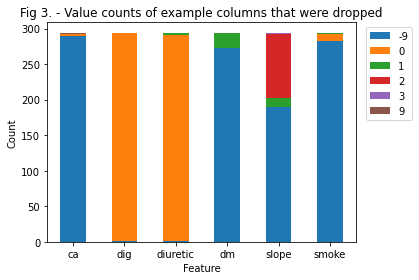

In [69]:
barDF = df[["dm","dig","slope","smoke","ca","diuretic"]]
#print(barDF)
melt = barDF.melt()
crosstab = pd.crosstab(melt["variable"], melt["value"])

ax = crosstab.plot(kind="bar", stacked=True, xlabel = "Feature", ylabel="Count", rot=0)
ax.legend(bbox_to_anchor=(1.2, 1))
plt.title("Fig 3. - Value counts of example columns that were dropped")
plt.tight_layout()
plt.show()

In [70]:
#Now lets analyse our entries which have nulls
nullData



[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1103, ['htn']],
 [1258, ['chol']],
 [1285, ['chol']],
 [1292, ['chol']],
 [1187, ['chol']],
 [1211, ['chol']],
 [1216, ['chol']],
 [1131, ['chol']],
 [1132, ['chol']],
 [1144, ['chol']],
 [1145, ['chol']],
 [1150, ['chol']],
 [1151, ['chol']],
 [1157, ['chol']],
 [1159, ['chol']],
 [1166, ['chol']],
 [1068, ['chol']],
 [1096, ['chol']],
 [1027, ['chol']],
 [1033, ['chol']],
 [1038, ['chol']],
 [1042, ['chol']],
 [1051, ['chol']],
 [1052, ['chol']],
 [1282, ['fbs']],
 [1201, ['fbs']],
 [1229, ['fbs']],
 [1062, ['fbs']],
 [1071, ['fbs']],
 [1089, ['fbs']],
 [1109, ['fbs']],
 [1111, ['fbs']],
 [1001, ['restecg']],
 [1284, ['prop']],
 [1294, ['prop', 'nitr', 'pro', 'thaldur']],
 [1029, ['thaldur']],
 [1172, ['met']],
 [5001, ['met']],
 [1249, ['rldv5']]]

In [71]:
"""
    Key Takeaways: 
        - 1053 and 1294 are missing quite a few values, is this grounds for exclusion?
        - Many missing values for:
            - chol
            - fbs
            for these values maybe we should do a mean/median of some sort, perhaps with some random noise added?
"""


'\n    Key Takeaways: \n        - 1053 and 1294 are missing quite a few values, is this grounds for exclusion?\n        - Many missing values for:\n            - chol\n            - fbs\n            for these values maybe we should do a mean/median of some sort, perhaps with some random noise added?\n'

In [72]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1103, ['htn']],
 [1258, ['chol']],
 [1285, ['chol']],
 [1292, ['chol']],
 [1187, ['chol']],
 [1211, ['chol']],
 [1216, ['chol']],
 [1131, ['chol']],
 [1132, ['chol']],
 [1144, ['chol']],
 [1145, ['chol']],
 [1150, ['chol']],
 [1151, ['chol']],
 [1157, ['chol']],
 [1159, ['chol']],
 [1166, ['chol']],
 [1068, ['chol']],
 [1096, ['chol']],
 [1027, ['chol']],
 [1033, ['chol']],
 [1038, ['chol']],
 [1042, ['chol']],
 [1051, ['chol']],
 [1052, ['chol']],
 [1282, ['fbs']],
 [1201, ['fbs']],
 [1229, ['fbs']],
 [1062, ['fbs']],
 [1071, ['fbs']],
 [1089, ['fbs']],
 [1109, ['fbs']],
 [1111, ['fbs']],
 [1001, ['restecg']],
 [1284, ['prop']],
 [1294, ['prop', 'nitr', 'pro', 'thaldur']],
 [1029, ['thaldur']],
 [1172, ['met']],
 [5001, ['met']],
 [1249, ['rldv5']]]

In [73]:
len(drop)

50

In [74]:
#Dealing with cholesterol missing values

#Assign random integer values between 230 (the mean) and 237 (the median)
import random

toRemove = []
tag = False
for i in range(0,len(nullData)):
    for j in range(0,len(nullData[i][1])):
        if nullData[i][1][j] == "chol":
            row = df.loc[df["id"] == nullData[i][0]].index.values
            df.iloc[row[0],11] = random.randint(230,237)
            if len(nullData[i][1]) == 1:
                toRemove.append(i)
            else:
                tag = True
    if tag:
        nullData[i][1].remove("chol")
        tag = False
new = []
for i in range(0,len(nullData)):
    if i not in toRemove:
        new.append(nullData[i])
nullData = new




In [75]:
#Check "chol" column
col = "chol"
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

count    294.000000
mean     249.503401
std       65.115951
min       85.000000
25%      211.250000
50%      237.000000
75%      277.000000
max      603.000000
Name: chol, dtype: float64 

237    9
230    7
231    5
246    5
232    5
      ..
85     1
329    1
210    1
307    1
166    1
Name: chol, Length: 156, dtype: int64 



In [76]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1103, ['htn']],
 [1282, ['fbs']],
 [1201, ['fbs']],
 [1229, ['fbs']],
 [1062, ['fbs']],
 [1071, ['fbs']],
 [1089, ['fbs']],
 [1109, ['fbs']],
 [1111, ['fbs']],
 [1001, ['restecg']],
 [1284, ['prop']],
 [1294, ['prop', 'nitr', 'pro', 'thaldur']],
 [1029, ['thaldur']],
 [1172, ['met']],
 [5001, ['met']],
 [1249, ['rldv5']]]

In [77]:
#Dealing with fasting blood sugar missing values
"""

 0    266
 1     20
-9      8

P(column = 1) = 20/286

X ~ B(8, 20/286)
E(X) = 8 x 20/286 ~= 0.56

So we expect 0.56 of the 8 missing values to have a value of 1, so we have decided to assign one random missing value to 1

""" 


#Assign random row a value of 1, and all of the other a value of 0
v1 = random.randint(1,8)
print(v1,"\n")

toRemove = []
tag = False
count = 0
for i in range(0,len(nullData)):
    for j in range(0,len(nullData[i][1])):
        if nullData[i][1][j] == "fbs":
            count += 1
            row = df.loc[df["id"] == nullData[i][0]].index.values
            if count == v1:
                #Set to value 1
                df.iloc[row[0],15] = 1
            else:
                #Set to value 0
                df.iloc[row[0],15] = 0
            if len(nullData[i][1]) == 1:
                toRemove.append(i)
            else:
                tag = True
    if tag:
        nullData[i][1].remove("fbs")
        tag = False
new = []
for i in range(0,len(nullData)):
    if i not in toRemove:
        new.append(nullData[i])
nullData = new

6 



In [78]:
#Check "fbs" column
col = "fbs"
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

count    294.000000
mean       0.071429
std        0.257978
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64 

0    273
1     21
Name: fbs, dtype: int64 



In [79]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1103, ['htn']],
 [1001, ['restecg']],
 [1284, ['prop']],
 [1294, ['prop', 'nitr', 'pro', 'thaldur']],
 [1029, ['thaldur']],
 [1172, ['met']],
 [5001, ['met']],
 [1249, ['rldv5']]]

In [80]:
#Dealing with 1103's htn missing value
"""
We have decided to use the mode, 0, especially because there's only one value
"""

toRemove = []
tag = False
for i in range(0,len(nullData)):
    for j in range(0,len(nullData[i][1])):
        if nullData[i][1][j] == "htn":
            row = df.loc[df["id"] == nullData[i][0]].index.values
            df.iloc[row[0],10] = 0
            if len(nullData[i][1]) == 1:
                toRemove.append(i)
            else:
                tag = True
    if tag:
        nullData[i][1].remove("htn")
        tag = False
new = []
for i in range(0,len(nullData)):
    if i not in toRemove:
        new.append(nullData[i])
nullData = new

In [81]:
#Check "htn" column
col = "htn"
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

count    294.000000
mean       0.333333
std        0.472208
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: htn, dtype: float64 

0    196
1     98
Name: htn, dtype: int64 



In [82]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1001, ['restecg']],
 [1284, ['prop']],
 [1294, ['prop', 'nitr', 'pro', 'thaldur']],
 [1029, ['thaldur']],
 [1172, ['met']],
 [5001, ['met']],
 [1249, ['rldv5']]]

In [83]:
#Dealing with 1001's restecg missing value
"""
We have decided to use the mode, 0, especially because there's only one value
"""

toRemove = []
tag = False
for i in range(0,len(nullData)):
    for j in range(0,len(nullData[i][1])):
        if nullData[i][1][j] == "restecg":
            row = df.loc[df["id"] == nullData[i][0]].index.values
            df.iloc[row[0],18] = 0
            if len(nullData[i][1]) == 1:
                toRemove.append(i)
            else:
                tag = True
    if tag:
        nullData[i][1].remove("restecg")
        tag = False
new = []
for i in range(0,len(nullData)):
    if i not in toRemove:
        new.append(nullData[i])
nullData = new

In [84]:
#Check "restecg" column
col = "restecg"
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

count    294.000000
mean       0.217687
std        0.460257
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: restecg, dtype: float64 

0    236
1     52
2      6
Name: restecg, dtype: int64 



In [85]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1284, ['prop']],
 [1294, ['prop', 'nitr', 'pro', 'thaldur']],
 [1029, ['thaldur']],
 [1172, ['met']],
 [5001, ['met']],
 [1249, ['rldv5']]]

In [86]:
#Dealing with prop missing value
"""
We have decided to use the mode, 0, especially because we can't assume people used beta blockers
"""

toRemove = []
tag = False
for i in range(0,len(nullData)):
    for j in range(0,len(nullData[i][1])):
        if nullData[i][1][j] == "prop":
            row = df.loc[df["id"] == nullData[i][0]].index.values
            df.iloc[row[0],23] = 0
            if len(nullData[i][1]) == 1:
                toRemove.append(i)
            else:
                tag = True
    if tag:
        nullData[i][1].remove("prop")
        tag = False
new = []
for i in range(0,len(nullData)):
    if i not in toRemove:
        new.append(nullData[i])
nullData = new

In [87]:
#Check "prop" column
col = "prop"
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

count    294.000000
mean       0.061224
std        0.240150
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: prop, dtype: float64 

0    276
1     18
Name: prop, dtype: int64 



In [88]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1294, ['nitr', 'pro', 'thaldur']],
 [1029, ['thaldur']],
 [1172, ['met']],
 [5001, ['met']],
 [1249, ['rldv5']]]

In [89]:
#Dealing with thaldur missing value
"""
We have decided to use the mean, 10.5 minutes, for the missing values
"""

toRemove = []
tag = False
for i in range(0,len(nullData)):
    for j in range(0,len(nullData[i][1])):
        if nullData[i][1][j] == "thaldur":
            row = df.loc[df["id"] == nullData[i][0]].index.values
            df.iloc[row[0],28] = 10.5
            if len(nullData[i][1]) == 1:
                toRemove.append(i)
            else:
                tag = True
    if tag:
        nullData[i][1].remove("thaldur")
        tag = False
new = []
for i in range(0,len(nullData)):
    if i not in toRemove:
        new.append(nullData[i])
nullData = new

In [90]:
#Check "thaldur" column
col = "thaldur"
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

count    294.000000
mean      10.625850
std        4.627357
min        1.000000
25%        7.000000
50%       10.000000
75%       13.000000
max       24.000000
Name: thaldur, dtype: float64 

10.0    28
9.0     27
7.0     24
11.0    23
12.0    23
13.0    23
8.0     18
14.0    16
6.0     15
18.0    15
19.0    12
5.0     10
4.0      9
2.0      8
15.0     8
3.0      7
16.0     6
20.0     6
17.0     5
10.5     2
1.5      2
6.5      1
16.5     1
21.0     1
7.5      1
24.0     1
4.5      1
1.0      1
Name: thaldur, dtype: int64 



In [91]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1294, ['nitr', 'pro']],
 [1172, ['met']],
 [5001, ['met']],
 [1249, ['rldv5']]]

In [92]:
#Dealing with met missing value
"""
We have decided to use the mean, 5.6, for the missing values
"""

toRemove = []
tag = False
for i in range(0,len(nullData)):
    for j in range(0,len(nullData[i][1])):
        if nullData[i][1][j] == "met":
            row = df.loc[df["id"] == nullData[i][0]].index.values
            df.iloc[row[0],30] = 5.6
            if len(nullData[i][1]) == 1:
                toRemove.append(i)
            else:
                tag = True
    if tag:
        nullData[i][1].remove("met")
        tag = False
new = []
for i in range(0,len(nullData)):
    if i not in toRemove:
        new.append(nullData[i])
nullData = new

In [93]:
#Check "met" column
col = "met"
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

count    294.000000
mean       5.699660
std        1.858097
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       11.000000
Name: met, dtype: float64 

5.0     68
6.0     58
7.0     56
4.0     34
9.0     27
3.0     23
2.0     13
10.0     5
8.0      3
5.6      2
6.3      2
11.0     1
7.5      1
5.4      1
Name: met, dtype: int64 



In [94]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1294, ['nitr', 'pro']],
 [1249, ['rldv5']]]

In [95]:
#Dealing with rldv5 missing value
"""
We have decided to use the median, 13, for the missing values
"""

toRemove = []
tag = False
for i in range(0,len(nullData)):
    for j in range(0,len(nullData[i][1])):
        if nullData[i][1][j] == "rldv5":
            row = df.loc[df["id"] == nullData[i][0]].index.values
            df.iloc[row[0],41] = 13
            if len(nullData[i][1]) == 1:
                toRemove.append(i)
            else:
                tag = True
    if tag:
        nullData[i][1].remove("rldv5")
        tag = False
new = []
for i in range(0,len(nullData)):
    if i not in toRemove:
        new.append(nullData[i])
nullData = new

In [96]:
#Check "rldv5" column
col = "rldv5"
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

count    294.000000
mean      13.680272
std        5.572343
min        3.000000
25%       10.000000
50%       13.000000
75%       17.000000
max       31.000000
Name: rldv5, dtype: float64 

10    27
13    23
14    23
12    21
15    19
11    17
17    15
18    15
9     15
8     14
20    12
16    11
7     10
5      9
4      9
6      9
22     7
19     7
24     7
23     6
21     6
25     5
28     2
27     2
26     1
31     1
3      1
Name: rldv5, dtype: int64 



In [97]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']],
 [1294, ['nitr', 'pro']]]

In [98]:
#Dealing with nitr and pro missing values for 1294
"""
We have selected the mode for both attributes, 0.
"""
row = df.loc[df["id"] == 1294].index.values
df.iloc[row[0],24] = 0
df.iloc[row[0],25] = 0

nullData.pop()

[1294, ['nitr', 'pro']]

In [99]:
#Checking nitr and pro attributes
print(df["nitr"].describe(),"\n")
print(df["nitr"].value_counts(),"\n")

print(df["pro"].describe(),"\n")
print(df["pro"].value_counts(),"\n")

count    294.000000
mean       0.095238
std        0.294044
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: nitr, dtype: float64 

0    266
1     28
Name: nitr, dtype: int64 

count    294.000000
mean       0.081633
std        0.274271
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: pro, dtype: float64 

0    270
1     24
Name: pro, dtype: int64 



In [100]:
nullData

[[1053,
  ['trestbps',
   'thalach',
   'thalrest',
   'tpeakbps',
   'tpeakbpd',
   'trestbpd',
   'exang']]]

In [101]:
#Getting rid of 1053
"""
Since we have enough data, losing one instance is unlikely to affect us
"""
df = df[df.id != 1053]
print(len(df))

293


In [102]:
#Now drop all the columns we have decided to drop
df = df.drop(drop, axis=1)

In [103]:
with pd.option_context("display.max_columns", None): 
    print(df.head())

   age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  \
0   40    1        1         0        0   2       140    0   289    0   
1   49    0        1         0        0   3       160    1   180    0   
2   37    1        1         0        0   2       130    0   283    0   
3   48    0        1         1        1   4       138    0   214    0   
4   54    1        1         0        1   3       150    0   233    0   

   restecg  prop  nitr  pro  thaldur  met  thalach  thalrest  tpeakbps  \
0        0     0     0    0     18.0  7.0      172        86       200   
1        0     0     0    0     10.0  7.0      156       100       220   
2        1     0     0    0     10.0  5.0       98        58       180   
3        0     0     0    0      5.0  4.0      108        54       210   
4        0     0     1    1      2.0  3.0      122        74       130   

   tpeakbpd  trestbpd  exang  oldpeak  rldv5  rldv5e  num  
0       110        86      0      0.0     26      20    

In [104]:
#Change the target column "num" to have only 0s or 1s
df["num"].replace([0, 1, 2, 3, 4],[0, 1, 1, 1, 1], inplace = True)

In [105]:
df.head()

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,fbs,...,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,oldpeak,rldv5,rldv5e,num
0,40,1,1,0,0,2,140,0,289,0,...,172,86,200,110,86,0,0.0,26,20,0
1,49,0,1,0,0,3,160,1,180,0,...,156,100,220,106,90,0,1.0,14,13,1
2,37,1,1,0,0,2,130,0,283,0,...,98,58,180,100,80,0,0.0,17,14,0
3,48,0,1,1,1,4,138,0,214,0,...,108,54,210,106,86,1,1.5,19,22,1
4,54,1,1,0,1,3,150,0,233,0,...,122,74,130,100,90,0,0.0,13,9,0


     num  sex  painloc
0      0    1        1
1      1    0        1
2      0    1        1
3      1    0        1
4      0    1        1
..   ...  ...      ...
288    0    1        1
290    0    1        1
291    0    1        0
292    0    0        0
293    0    1        1

[293 rows x 3 columns]


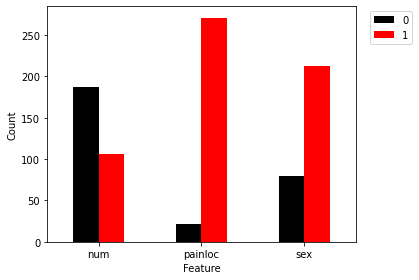

<Figure size 288x288 with 0 Axes>

In [106]:
barDF = df[["num","sex","painloc"]]
print(barDF)
melt = barDF.melt()
crosstab = pd.crosstab(melt["variable"], melt["value"])

ax = crosstab.plot(kind="bar", stacked=False, xlabel = "Feature", ylabel="Count", rot=0, color=['black', 'red'])
ax.legend(bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.figure(figsize=(4, 4))
plt.show()

In [107]:
#Check "num" column
col = "num"
print(df[col].describe(),"\n")
print(df[col].value_counts(),"\n")

"""
0    188
1     37
3     28
2     26
4     15
"""

count    293.000000
mean       0.361775
std        0.481336
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: num, dtype: float64 

0    187
1    106
Name: num, dtype: int64 



'\n0    188\n1     37\n3     28\n2     26\n4     15\n'

In [108]:
#Rename Columns

In [109]:
#Fill in missing values if empty with nulls ("NA" or "NaN")

In [110]:
#Deal with outliers, perhaps by removing them (box/whiskers plot)
"""
Already Cleared

    - age: all values between 28 and 66
    - cp: categorical data with no outliers (values between 1 and 4)
    - restecg: categorical data with no outliers (values between 1 and 2)
    
    -All others are boolean
    
Needs Checking:
    - trestbps
    - chol
    - thaldur
    - met
    - thalach, thalrest, tpeakbps, tpeakbpd, trestbpd
    - oldpeak
    - rldv5 & rldv5e
"""

'\nAlready Cleared\n\n    - age: all values between 28 and 66\n    - cp: categorical data with no outliers (values between 1 and 4)\n    - restecg: categorical data with no outliers (values between 1 and 2)\n    \n    -All others are boolean\n    \nNeeds Checking:\n    - trestbps\n    - chol\n    - thaldur\n    - met\n    - thalach, thalrest, tpeakbps, tpeakbpd, trestbpd\n    - oldpeak\n    - rldv5 & rldv5e\n'

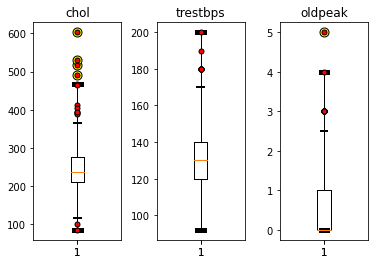

In [111]:
fig, ax = plt.subplots(1,3)

ax[0].boxplot(df["chol"], whis=3, capprops = {"linestyle":"-", "linewidth":5, "color":"black"}, flierprops={"marker": "o", "markersize": 9, "markerfacecolor":"yellow"})
ax[0].boxplot(df["chol"], whis=1.5, capprops = {"linestyle":"-", "linewidth":2, "color":"black"}, flierprops={"marker": "o", "markersize": 5, "markerfacecolor": "red"})
ax[0].set_title("chol")

ax[1].boxplot(df["trestbps"], whis=3, capprops = {"linestyle":"-", "linewidth":5, "color":"black"}, flierprops={"marker": "o", "markersize": 9, "markerfacecolor":"yellow"})
ax[1].boxplot(df["trestbps"], whis=1.5, capprops = {"linestyle":"-", "linewidth":2, "color":"black"}, flierprops={"marker": "o", "markersize": 5, "markerfacecolor": "red"})
ax[1].set_title("trestbps")

ax[2].boxplot(df["oldpeak"], whis=3, capprops = {"linestyle":"-", "linewidth":5, "color":"black"}, flierprops={"marker": "o", "markersize": 9, "markerfacecolor":"yellow"})
ax[2].boxplot(df["oldpeak"], whis=1.5, capprops = {"linestyle":"-", "linewidth":2, "color":"black"}, flierprops={"marker": "o", "markersize": 5, "markerfacecolor": "red"})
ax[2].set_title("oldpeak")

plt.subplots_adjust(wspace=0.4)
plt.show()

In [112]:
#Check outliers for trestbps
col = "trestbps"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 140 - 120 = 20
    - LF = LQ - 1.5(IQR) = 120 - 1.5(20) = 90, min value of 92 so no outliers here
    - UF = UQ + 1.5(IQR) = 140 + 1.5(20) = 170, some outliers here since max is 200
"""

print(df.loc[df[col] > 170])

"""
    - We have decided against removing these outliers or imputing them because higher blood pressures correlate strongly to 
    heart problems
    - These figures are possible figures and aren't certainly misinputs 
"""

count    293.000000
mean     132.583618
std       17.626568
min       92.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64 

     age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
109   39    1        1         0        0   2       190    0   241    0  ...   
123   58    0        1         0        0   2       180    0   393    0  ...   
190   53    1        1         1        1   4       180    1   285    0  ...   
191   46    1        1         1        1   4       180    1   280    0  ...   
242   54    1        1         1        1   4       200    1   198    0  ...   
275   45    0        0         0        0   2       180    0   234    0  ...   
276   59    1        1         0        1   3       180    1   213    0  ...   
279   57    0        1         1        1   4       180    0   347    0  ...   

     thalach  thalrest  tpeakbps  tpeakbpd  trestbpd  exang  oldpeak  rldv5  \
109    

"\n    - We have decided against removing these outliers or imputing them because higher blood pressures correlate strongly to \n    heart problems\n    - These figures are possible figures and aren't certainly misinputs \n"

In [113]:
#Check outliers for chol
col = "chol"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 277 - 211 = 66
    - LF = LQ - 1.5(IQR) = 211 - 1.5(66) = 112 
    - UF = UQ + 1.5(IQR) = 277 + 1.5(66) = 376 
    
"""

print(df.loc[df[col] > 376])

"""
    - We have decided against removing these outliers or imputing them because higher cholesterol levels strongly correlate 
    to heart problems by directly narrowing major blood vessels of the heart (it is a key estimator)
    - These figures are possible figures and aren't certainly misinputs 
"""

count    293.000000
mean     249.303754
std       65.137157
min       85.000000
25%      211.000000
50%      237.000000
75%      277.000000
max      603.000000
Name: chol, dtype: float64 

     age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
28    53    0        1         0        0   2       113    0   468    0  ...   
30    53    1        1         1        0   3       145    1   518    0  ...   
69    44    1        1         1        1   4       150    1   412    0  ...   
76    32    1        1         1        1   4       118    0   529    0  ...   
102   40    0        1         1        1   4       150    1   392    0  ...   
103   40    1        1         1        1   4       120    0   466    0  ...   
123   58    0        1         0        0   2       180    0   393    0  ...   
132   56    1        1         1        1   4       170    1   388    0  ...   
149   54    1        1         1        1   4       130    1   603    1  ...   
183   52   

"\n    - We have decided against removing these outliers or imputing them because higher cholesterol levels strongly correlate \n    to heart problems by directly narrowing major blood vessels of the heart (it is a key estimator)\n    - These figures are possible figures and aren't certainly misinputs \n"

In [114]:
#Check outliers for thaldur
col = "thaldur"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 13 - 7 = 6
    - LF = LQ - 1.5(IQR) = 7 - 1.5(6) < 0 so all good here 
    - UF = UQ + 1.5(IQR) = 13 + 1.5(6) = 21 
    
"""

print(df.loc[df[col] > 21])

"""
    - We have decided to remove this as it is just one instance
"""
remove = [119]

count    293.000000
mean      10.624573
std        4.635222
min        1.000000
25%        7.000000
50%       10.000000
75%       13.000000
max       24.000000
Name: thaldur, dtype: float64 

     age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
119   34    1        0         0        0   1       140    0   156    0  ...   

     thalach  thalrest  tpeakbps  tpeakbpd  trestbpd  exang  oldpeak  rldv5  \
119      180        76       200        90        90      0      0.0     22   

     rldv5e  num  
119      22    1  

[1 rows x 26 columns]


In [115]:
#Check outliers for met
col = "met"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 7 - 5 = 2
    - LF = LQ - 1.5(IQR) = 5 - 1.5(2) = 2 
    - UF = UQ + 1.5(IQR) = 7 + 1.5(2) = 10
    
"""

print(df.loc[df[col] > 10])

"""
    - We have decided to remove this as it is just one instance
"""
remove.append(25)

count    293.000000
mean       5.698635
std        1.861193
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       11.000000
Name: met, dtype: float64 

    age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
25   36    1        1         0        1   3       130    0   209    0  ...   

    thalach  thalrest  tpeakbps  tpeakbpd  trestbpd  exang  oldpeak  rldv5  \
25      178        74       200        90        80      0      0.0     23   

    rldv5e  num  
25      20    0  

[1 rows x 26 columns]


In [116]:
#Check outliers for thalach
col = "thalach"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 155 - 122 = 33
    - LF = LQ - 1.5(IQR) = 122 - 1.5(33) = 72.5
    - UF = UQ + 1.5(IQR) = 155 + 1.5(33) = 204.5
    
"""

#print(df.loc[df[col] > 10])

"""
    - No outliers present
"""

count    293.000000
mean     139.129693
std       23.589749
min       82.000000
25%      122.000000
50%      140.000000
75%      155.000000
max      190.000000
Name: thalach, dtype: float64 



'\n    - No outliers present\n'

In [117]:
#Check outliers for thalrest
col = "thalrest"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 92 - 70 = 22
    - LF = LQ - 1.5(IQR) = 70 - 1.5(22) = 37
    - UF = UQ + 1.5(IQR) = 92 + 1.5(22) = 125
    
"""

print(df.loc[df[col] > 125])

"""
    - We have decided to remove this as it is just one instance
"""
remove.append(48)

count    293.000000
mean      81.034130
std       15.534943
min       46.000000
25%       70.000000
50%       80.000000
75%       92.000000
max      134.000000
Name: thalrest, dtype: float64 

    age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
48   36    1        1         0        0   3       112    0   340    0  ...   

    thalach  thalrest  tpeakbps  tpeakbpd  trestbpd  exang  oldpeak  rldv5  \
48      184       134       150        82        70      0      1.0     24   

    rldv5e  num  
48      28    0  

[1 rows x 26 columns]


In [118]:
#Check outliers for tpeakbps
col = "tpeakbps"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 200 - 160 = 40
    - LF = LQ - 1.5(IQR) = 160 - 1.5(40) = 100
    - UF = UQ + 1.5(IQR) = 200 + 1.5(40) = 260
    
"""

#print(df.loc[df[col] > 125])

"""
    - No outliers
"""


count    293.000000
mean     181.279863
std       25.615776
min      120.000000
25%      160.000000
50%      180.000000
75%      200.000000
max      240.000000
Name: tpeakbps, dtype: float64 



'\n    - No outliers\n'

In [119]:
#Check outliers for tpeakbpd
col = "tpeakbpd"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 100 - 90 = 10
    - LF = LQ - 1.5(IQR) = 90 - 1.5(10) = 75
    - UF = UQ + 1.5(IQR) = 100 + 1.5(10) = 115
    
"""

print(df.loc[df[col] < 75])

"""
    - Lots of outliers but we dont want to remove all of them and lose a significant amount of data, and we dont want to impute
    them to the median because we believe these values are not mis inputs, and together with tpeakbps (s for systolic, d for
    diastolic) they can be used to determine healthy heart function or not
"""

count    293.000000
mean      95.713311
std       12.369859
min       60.000000
25%       90.000000
50%       95.000000
75%      100.000000
max      134.000000
Name: tpeakbpd, dtype: float64 

     age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
7     54    1        1         0        0   2       110    0   208    0  ...   
49    41    1        1         1        1   4       110    0   289    0  ...   
76    32    1        1         1        1   4       118    0   529    0  ...   
80    55    1        1         0        1   3       110    1   277    0  ...   
107   34    1        1         0        0   2       150    0   214    0  ...   
151   48    1        1         0        0   2       100    0   237    0  ...   
162   47    1        1         0        0   2       160    0   263    0  ...   
234   41    1        1         1        1   4       112    0   250    0  ...   

     thalach  thalrest  tpeakbps  tpeakbpd  trestbpd  exang  oldpeak  rldv5  \
7      

'\n    - Lots of outliers but we dont want to remove all of them and lose a significant amount of data, and we dont want to impute\n    them to the median because we believe these values are not mis inputs, and together with tpeakbps (s for systolic, d for\n    diastolic) they can be used to determine healthy heart function or not\n'

In [120]:
#Check outliers for trestbpd
col = "trestbpd"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 90 - 80 = 10
    - LF = LQ - 1.5(IQR) = 80 - 1.5(10) = 65
    - UF = UQ + 1.5(IQR) = 90 + 1.5(10) = 105
    
"""

print(df.loc[df[col] > 105])

"""
    - A few outliers but we dont want to remove them and lose data, and we dont want to impute
    them to the median because we believe these values are not mis inputs. These are possible values of blood pressure that
    we want our models to account for
"""

count    293.000000
mean      84.395904
std        9.267722
min       50.000000
25%       80.000000
50%       80.000000
75%       90.000000
max      110.000000
Name: trestbpd, dtype: float64 

     age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
142   47    1        1         1        1   4       160    1   291    0  ...   
243   55    1        1         0        0   2       160    1   292    1  ...   
266   54    1        1         0        0   2       160    1   305    0  ...   

     thalach  thalrest  tpeakbps  tpeakbpd  trestbpd  exang  oldpeak  rldv5  \
142      158        86       140        82       106      1      3.0     20   
243      143        96       200       120       110      1      2.0     12   
266      175       100       210       110       110      0      0.0      6   

     rldv5e  num  
142      17    1  
243      17    1  
266       7    0  

[3 rows x 26 columns]


'\n    - A few outliers but we dont want to remove them and lose data, and we dont want to impute\n    them to the median because we believe these values are not mis inputs. These are possible values of blood pressure that\n    we want our models to account for\n'

In [121]:
#Check outliers for oldpeak
col = "oldpeak"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 1 - 0 = 1
    - LF = LQ - 1.5(IQR) = 0 - 1.5(1) < 0 so no outliers
    - UF = UQ + 1.5(IQR) = 1 + 1.5(1) = 2.5
    
"""

print(df.loc[df[col] > 2.5])

"""
    - A lot of outliers present above 2.5, but these are possible values and large ST dperessions relative to rest can be a sign
    of myocardial ischemia. We won't be removing these
"""

count    293.000000
mean       0.581229
std        0.906421
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: oldpeak, dtype: float64 

     age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
19    36    1        1         0        0   2       120    0   267    0  ...   
23    44    1        1         0        0   2       150    0   288    0  ...   
26    53    1        1         1        1   4       124    0   260    0  ...   
68    52    1        1         1        1   4       160    1   246    0  ...   
111   57    1        1         1        1   4       150    1   255    0  ...   
142   47    1        1         1        1   4       160    1   291    0  ...   
155   56    1        1         1        1   4       155    1   342    1  ...   
167   50    1        1         1        1   4       140    0   231    0  ...   
237   41    1        1         1        1   4       120    1   336    0  ...   
240   48

"\n    - A lot of outliers present above 2.5, but these are possible values and large ST dperessions relative to rest can be a sign\n    of myocardial ischemia. We won't be removing these\n"

In [122]:
#Check outliers for rldv5
col = "rldv5"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 17 - 10 = 7
    - LF = LQ - 1.5(IQR) = 10 - 1.5(7) < 0 so no outliers
    - UF = UQ + 1.5(IQR) = 17 + 1.5(7) = 27.5
    
"""

print(df.loc[df[col] > 27.5])


count    293.000000
mean      13.672355
std        5.580220
min        3.000000
25%       10.000000
50%       13.000000
75%       17.000000
max       31.000000
Name: rldv5, dtype: float64 

     age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
50    50    1        1         1        1   4       130    0   233    0  ...   
76    32    1        1         1        1   4       118    0   529    0  ...   
137   39    1        1         0        0   2       120    0   231    0  ...   

     thalach  thalrest  tpeakbps  tpeakbpd  trestbpd  exang  oldpeak  rldv5  \
50       121        98       170       100        90      1      2.0     31   
76       130        74       180        70        70      0      0.0     28   
137      146        84       210       100        80      0      2.0     28   

     rldv5e  num  
50       26    1  
76       28    1  
137      30    0  

[3 rows x 26 columns]


In [123]:
#Check outliers for rldv5e
col = "rldv5e"
print(df[col].describe(),"\n")

"""
    - IQR = UQ - LQ = 17 - 9 = 8
    - LF = LQ - 1.5(IQR) = 9 - 1.5(8) < 0 so no outliers
    - UF = UQ + 1.5(IQR) = 17 + 1.5(8) = 29
    
"""

print(df.loc[df[col] > 29])

"""
    - In combination with rldv5 above, we have decided to remove just subject 137, keeping the rest to avoid too much skew 
    towards the outliers
"""
remove.append(137)

count    293.000000
mean      13.296928
std        5.354926
min        2.000000
25%        9.000000
50%       13.000000
75%       17.000000
max       30.000000
Name: rldv5e, dtype: float64 

     age  sex  painloc  painexer  relrest  cp  trestbps  htn  chol  fbs  ...  \
137   39    1        1         0        0   2       120    0   231    0  ...   

     thalach  thalrest  tpeakbps  tpeakbpd  trestbpd  exang  oldpeak  rldv5  \
137      146        84       210       100        80      0      2.0     28   

     rldv5e  num  
137      30    0  

[1 rows x 26 columns]


In [124]:
print(remove)
print(len(df))
df = df.drop(remove)
print(len(df))

[119, 25, 48, 137]
293
289


In [125]:
#Clean strings

In [126]:
#Change levels in categorical data

In [127]:
#Cast attributes between numeric and string

In [128]:
"""
    - Adjust the scale of the data (chol 600 but boolean attributes are 0 or 1)    
        - age, cp, trestbps, chol, restecg, thaldur, met, thalach, thalrest,
        tpeakbps, tpeakbpd, trestbpd, oldpeak, rldv5 and rldv5e
        
    -We have decided to do min-max normalisation feauture scaling to keep all of the values in line with our boolean features
"""

for i in ["age", "cp", "trestbps", "chol", "restecg", "thaldur", "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd", "trestbpd", "oldpeak", "rldv5", "rldv5e"]:
    f = df[i]
    normF = (f - f.min()) / (f.max() - f.min())
    df[i] = normF


"""
#    - Using sklearn standardscalar to do standardization (z-score normalization)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df.columns.values
print(columns)
print(df)

scaler.fit(df)

df = pd.DataFrame(scaler.transform(df), columns=columns)
f = df["num"]
normF = (f - f.min()) / (f.max() - f.min())
df["num"] = normF
print(df)
"""

'\n#    - Using sklearn standardscalar to do standardization (z-score normalization)\n\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\ncolumns = df.columns.values\nprint(columns)\nprint(df)\n\nscaler.fit(df)\n\ndf = pd.DataFrame(scaler.transform(df), columns=columns)\nf = df["num"]\nnormF = (f - f.min()) / (f.max() - f.min())\ndf["num"] = normF\nprint(df)\n'

In [129]:
#Write this new, preprocessed file to a text file
df = df.reset_index()
df.to_csv('dataML.csv')